# Load Python  Libraries

In [112]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;  sns.set(font_scale=1.2)
%matplotlib inline


from sklearn import svm
import pickle
import warnings
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, confusion_matrix, 

warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv("recipes.csv")
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [89]:
df.tail()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
15,Cupcake,42,18,25,9,5,1,0,0
16,Cupcake,36,14,21,14,11,2,1,0
17,Cupcake,38,15,31,8,6,1,1,0
18,Cupcake,36,16,24,12,9,1,1,0
19,Cupcake,34,17,23,11,13,0,1,0


In [10]:
df.dtypes

Type             object
Flour             int64
Milk              int64
Sugar             int64
Butter            int64
Egg               int64
Baking Powder     int64
Vanilla           int64
Salt              int64
dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           20 non-null     object
 1   Flour          20 non-null     int64 
 2   Milk           20 non-null     int64 
 3   Sugar          20 non-null     int64 
 4   Butter         20 non-null     int64 
 5   Egg            20 non-null     int64 
 6   Baking Powder  20 non-null     int64 
 7   Vanilla        20 non-null     int64 
 8   Salt           20 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.5+ KB


# Plot The Data

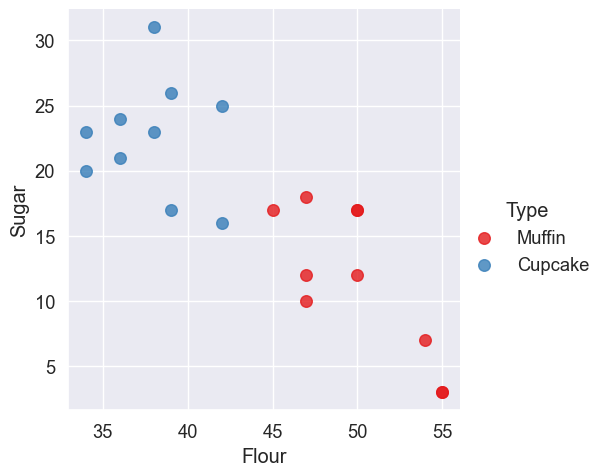

In [60]:
#plot the data

sns.lmplot(x = 'Flour', y = 'Sugar', data=df, hue='Type', palette = 'Set1', fit_reg = False, scatter_kws ={"s": 70});

# Data Preprocessing

In [36]:

type_label = np.where(df['Type']=='Muffin', 0, 1)

df_features = df.columns.values[1:].tolist()
df_features

ingredients= df[['Flour', 'Sugar']].values

ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

# Fit the model


In [41]:
model = svm.SVC(kernel = "linear")
model.fit(ingredients, type_label)

SVC(kernel='linear')

# Separating the Hyperplane

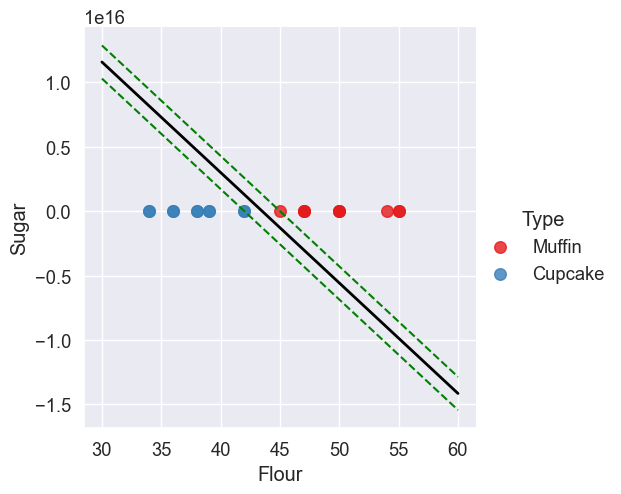

In [69]:
w = model.coef_[0]

a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the Parallel to the separating hyperplane that pass through the Support Vectors\

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model .support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

sns.lmplot(x = 'Flour', y = 'Sugar', data=df, hue='Type', palette = 'Set1', fit_reg = False, scatter_kws ={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--', color="green") 
plt.plot(xx, yy_up, 'k--', color='green') 

# Predict with the Model

In [83]:
def muffin_or_cupcake(Flour, Sugar):
    if (model.predict([[Flour, Sugar]]))==0:
        print('You\' re looking for Muffin Recipe')
    else:
        print('You\' re looking for Cupcake Recipe')


In [126]:
muffin_or_cupcake(30, 20)

You' re looking for Cupcake Recipe


# Plot the Prediction Graph

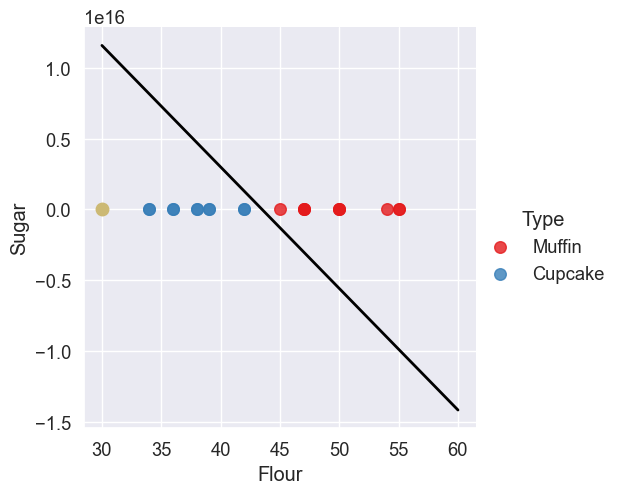

In [125]:
#Plot the predicted recipe
sns.lmplot(x = 'Flour', y = 'Sugar', data=df, hue='Type', palette = 'Set1', fit_reg = False, scatter_kws ={"s": 70});
plt.plot(xx, yy, linewidth=2, color="black")

# Add another line
plt.plot(30, 20, 'yo', markersize='9') 

# Save the Model

In [95]:
# Save the trained model with pickle
with open('recipe.pkl', 'wb') as file:
    pickle.dump(model, file)

....................................Thank you for readingle Lets meet in Deployment...........................